---
نکته برداری از سایت های:

1. https://www.youtube.com/watch?v=Nv4tDbCgMK0&list=PLs74m7pSWiut8T1HUKuBBLI7ldMMYZurw&index=2

 2. بخش Stratified Sampling از سایت:
https://faradars.org/courses/machine-learning-using-python-fvpht0091

 3. و چت جی پی تی و جیمینی

 

---
# Import:

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---
# view dataset

In [23]:

"""باز کردن فایل دیتا ست"""
df=pd.read_csv('diabetes.csv')
df.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
df.shape


(768, 9)

In [25]:
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [27]:
df.value_counts()


Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
12           140      82             43             325      39.2  0.528                     58   1          1
             121      78             17             0        26.5  0.259                     62   0          1
             106      80             0              0        23.6  0.137                     44   0          1
             100      84             33             105      30.0  0.488                     46   0          1
             92       62             7              258      27.6  0.926                     44   1          1
                                                                                                            ..
0            78       88             29             40       36.9  0.434                     21   0          1
             74       52             10             36       27.8  0.269                     22   0          1
      

In [28]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

---
# X , y

## 1 Make X , y


In [29]:
X=df.drop("Outcome",axis=1)
#نکته 1 : عبارت axis=1 یعنی تمام ستون منظور است

y=df["Outcome"]

In [30]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [31]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

##  2 Convert them to Array

In [32]:
X=np.array(X)
y=np.array(y)

In [33]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]],
      shape=(768, 8))

In [34]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

---
# Normalize
برای اینکه بخاطر بزرگ بودن بعضی از اعداد ستونها نسبت به بقیه ستونها مدل تفاوتی قائل نشود
همه را تبدیل به اعدادی می کنیم که بین صفر و یک شوند


In [35]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [36]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]], shape=(768, 8))

---
# Test /  Train 1

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


نکته: یعنی 20 درصد داده ها را تست در نظر بگیر
نکته: به طور خلاصه، random_state یک مقدار عددی است که به عنوان "seed" برای مولد اعداد تصادفی استفاده می‌شود. این کار تضمین می‌کند که:
1. تکرارپذیری: اگر random_state را با یک مقدار ثابت تنظیم کنید، هر بار که کد را اجرا می‌کنید،
.همان تقسیم داده‌ها را دریافت خواهید کرد
فرض کنید دو مدل یادگیری ماشین مختلف (مثلاً مدل A و مدل B) را برای یک مسئله خاص آموزش می‌دهید.
برای اینکه بتوانید به طور منصفانه عملکرد این دو مدل را با هم مقایسه کنید،
باید آنها را روی یک مجموعه داده آزمایشی یکسان ارزیابی کنید.
2.کنترل تصادفی بودن: بدون random_state، هر بار که train_test_split را اجرا می‌کنید، تقسیم داده‌ها متفاوت خواهد بود.
این امر می‌تواند منجر به نتایج متفاوتی در ارزیابی مدل شود.

---

گاهی لازمه که:
#  الف. روی نمونه خودماان طبقه بندی انجام دهیم 
# و ب. سپس تست و ترین را از هم جدا کنیم
# و ج. حذف ستونی که برای طبقه بندی ایجاد کرده بودیم

In [38]:
"""نمونه برداری طبقه بندی شده که مهمه"""
# نمونه‌برداری طبقه‌بندی شده (Stratified Sampling)
# در نمونه‌برداری طبقه‌بندی شده، جمعیت را به گروه‌های مشابه (طبقات) تقسیم می‌کنیم و سپس از هر گروه به صورت جداگانه نمونه‌گیری می‌کنیم.
# این کار باعث می‌شود که نمونه ما نماینده بهتری از کل جمعیت باشد و نظرات همه گروه‌ها در نمونه ما منعکس شود.
# 
# فرض کنید یک جعبه دارید که داخل آن تیله‌های رنگی (آبی، قرمز، سبز) وجود دارد

# با توجه به اینکه تعداد هر تیله ممکنه متفاوت باشد یا حتی نباشد
# اگر شما 20 درصد را از تمام اینها برداری ممکنه بعضی رنگ ها در نظر گرفته نشه و یا مقدارش فرق کنه.
# به همین دلیل، نمونه‌برداری طبقه‌بندی شده تأکید می‌کند که باید از هر طبقه (رنگ) به نسبت تعداد آن طبقه نمونه‌برداری کنیم.
# مثلا در این مثال:
# حجم کل نمونه:
#     20 درصد از 100 تیله = 20 تیله
# حجم نمونه قرمز:
#     از آنجایی که می‌خواهیم نسبت 30 درصد قرمز را در نمونه حفظ کنیم، باید 20 درصد از 30 تیله قرمز را انتخاب کنیم.
#     20 درصد از 30 تیله = 6 تیله

'نمونه برداری طبقه بندی شده که مهمه'

---

    

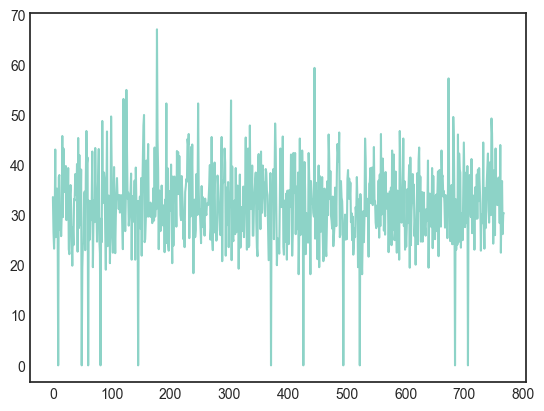

In [39]:
"""نمایش یک ستون دلخواه برای ایجاد طبقه بندی """
plt.plot(df["BMI"])
plt.show()


In [40]:
df["BMI"].isnull().sum()

np.int64(0)

 # الف. ایجاد نمونه
 # Stratified Sampling

In [41]:

# نکته بسیار مهم

"""
الف. ایجاد نمونه
 طبقه بندی با استفاده از پانداس
برای حالتی که  مقدار پیوسته باشد
خودم: دسته ها دقیق نیست خودم همینجوری نوشتم
"""
# یک دسته با نام BMI_categories به جدول اضافه میکنیم
# #  نکته مهم مهم : البته بعد از اینکه اسپلیت و .. را انجام دادیم این ستون را حذف میکنیم
 
df["BMI_categories"] = pd.cut(df["BMI"],
       bins=[-float('inf'),10,20,40,50,70,float('inf')],
       #bins بازه هایی است که میخواهیم به دسته های مختف تقسیم شود
       #عبارت np.inf هم یعنی بینهایت
       #طول بازه ها میتواند یکسان نباشد
       labels=[0,1,2,3,4,5])
        #برای هر ستون یک لیبل و نام در نظر میگیریم
        #6 تا لیبل انتخاب کردیم چون بین هر عدد را یک دسته میگیریم

In [42]:
"""صرف نمایش"""
df["BMI_categories"]

0      2
1      2
2      2
3      2
4      3
      ..
763    2
764    2
765    2
766    2
767    2
Name: BMI_categories, Length: 768, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [43]:
"""نمایش جدولی- میبینم که یک ستون با نام BMI_categories اضافه شد"""
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_categories
0,6,148,72,35,0,33.6,0.627,50,1,2
1,1,85,66,29,0,26.6,0.351,31,0,2
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,2
4,0,137,40,35,168,43.1,2.288,33,1,3
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,2
764,2,122,70,27,0,36.8,0.340,27,0,2
765,5,121,72,23,112,26.2,0.245,30,0,2
766,1,126,60,0,0,30.1,0.349,47,1,2


---


In [44]:
"""چک کردن اینکه در هر کتگوری از  BMI چه تعداد است"""
df["BMI_categories"].value_counts()

BMI_categories
2    647
3     88
1     14
0     11
4      8
5      0
Name: count, dtype: int64

<Axes: xlabel='BMI_categories'>

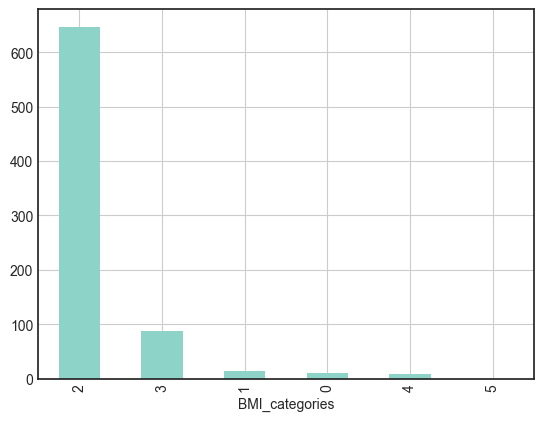

In [45]:
"""نمایش نمودار این ستون"""
df["BMI_categories"].value_counts().plot.bar(grid=True)
# جدول از ماکسیمم رسم میشه. برای اینکه از ابتدا اندیس 1 رسم بشه میتوان sort_index() را هم قرار دهیم

---

#  روش اول ب
# Test /  Train 2

In [46]:
# بیشتر مطالعه شود
"""Test /  Train 2"""
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2 , random_state=0)
#  عبارت n_splits تعداد دسته بندی مختلف را میده
#عبارت test_size=0.2 یعنی 20 درصد نمونه ها  را برای تست درنظر بگیر
#عبارت  random_state مثل  seed در رندوم عمل میکنه

stratified_split=[]
for train_index , test_index in  sss.split(df, df["BMI_categories"]):
# df را به عنوان ایکس بهش میدیم و ستونی که خودمان درست کردیم را به عنوان  y
# چون نمونه تست را طبق این دسته بندی میخواهیم انجام دهیم
       stratified_train_set_n = df.iloc[train_index]
       #n را گذاشتیم که بدونیم به تعداد اسپلیت ها داره انجام میشه
       stratified_test_set_n = df.iloc[test_index]
       stratified_split.append([stratified_train_set_n,stratified_test_set_n])
stratified_train_set , stratified_test_set = stratified_split[0]


In [47]:
stratified_split[0]
# اندیس صفرم مانند بقیه اندیس ها یک لیست است که اولی شامل ترین و دومی تست هستش

[     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 127            1      118             58             36       94  33.3   
 685            2      129             74             26      205  33.2   
 494            3       80              0              0        0   0.0   
 432            1       80             74             11       60  30.0   
 505           10       75             82              0        0  33.3   
 ..           ...      ...            ...            ...      ...   ...   
 55             1       73             50             10        0  23.0   
 228            4      197             70             39      744  36.7   
 192            7      159             66              0        0  30.4   
 672           10       68            106             23       49  35.5   
 65             5       99             74             27        0  29.0   
 
      DiabetesPedigreeFunction  Age  Outcome BMI_categories  
 127                     0.261   23 

In [48]:
stratified_train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_categories
127,1,118,58,36,94,33.3,0.261,23,0,2
685,2,129,74,26,205,33.2,0.591,25,0,2
494,3,80,0,0,0,0.0,0.174,22,0,0
432,1,80,74,11,60,30.0,0.527,22,0,2
505,10,75,82,0,0,33.3,0.263,38,0,2
...,...,...,...,...,...,...,...,...,...,...
55,1,73,50,10,0,23.0,0.248,21,0,2
228,4,197,70,39,744,36.7,2.329,31,0,2
192,7,159,66,0,0,30.4,0.383,36,1,2
672,10,68,106,23,49,35.5,0.285,47,0,2


In [49]:
stratified_test_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_categories
446,1,100,72,12,70,25.3,0.658,28,0,2
345,8,126,88,36,108,38.5,0.349,49,0,2
323,13,152,90,33,29,26.8,0.731,43,1,2
61,8,133,72,0,0,32.9,0.270,39,1,2
344,8,95,72,0,0,36.8,0.485,57,0,2
...,...,...,...,...,...,...,...,...,...,...
744,13,153,88,37,140,40.6,1.174,39,0,3
256,3,111,56,39,0,30.1,0.557,30,0,2
556,1,97,70,40,0,38.1,0.218,30,0,2
667,10,111,70,27,0,27.5,0.141,40,1,2



#  روش دوم ب
# Test /  Train 3
 نکته بسیار مهم
 روش راحت تر برای اسپلیت ترین و تست برای طبقه بندی که ایجاد کردیم
یعنی خود تابع اسپلیت در کتابخانه سایکیت لرن یه پارامتر به نام stratify دارد 

In [50]:
stratified_train_set, stratified_test_set = train_test_split(df,
                                               test_size=0.2,
                                               stratify=df["BMI_categories"],
                                               random_state=40)

In [51]:
stratified_train_set

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,BMI_categories
664,6,115,60,39,0,33.7,0.245,40,1,2
572,3,111,58,31,44,29.5,0.430,22,0,2
83,0,101,65,28,0,24.6,0.237,22,0,2
594,6,123,72,45,230,33.6,0.733,34,0,2
427,1,181,64,30,180,34.1,0.328,38,1,2
...,...,...,...,...,...,...,...,...,...,...
507,1,130,60,23,170,28.6,0.692,21,0,2
119,4,99,76,15,51,23.2,0.223,21,0,2
527,3,116,74,15,105,26.3,0.107,24,0,2
290,0,78,88,29,40,36.9,0.434,21,0,2


#  ج. حذف ستونی که برای طبقه بندی ایجاد کرده بودیم


In [52]:
stratified_train_set = stratified_train_set.drop("BMI_categories",axis=1)
stratified_test_set = stratified_test_set.drop("BMI_categories",axis=1)

---
# آماده سازی بعد از تست و ترین از سمپل استرتیفای
"""آماده سازی برای اینکه کد شما با استفاده از مجموعه‌های داده ترین و تست که از نمونه‌برداری طبقه‌بندی شده به دست آمده‌اند کار کند"""



In [53]:

 # جداسازی ویژگی‌ها (X) و متغیر هدف (y) در مجموعه‌های ترین و تست طبقه‌بندی شده:
 # بعد از حذف ستون "BMI_categories"، باید ستون "Outcome" را از مجموعه‌های ترین و تست جدا کنید
 # تا متغیرهای X و y را برای هر مجموعه داشته باشید.


# جداسازی ویژگی‌ها و متغیر هدف برای مجموعه ترین
X_train_stratified = stratified_train_set.drop("Outcome", axis=1)
y_train_stratified = stratified_train_set["Outcome"]

# جداسازی ویژگی‌ها و متغیر هدف برای مجموعه تست
X_test_stratified = stratified_test_set.drop("Outcome", axis=1)
y_test_stratified = stratified_test_set["Outcome"]

# تبدیل به آرایه (اگر نیاز باشد)
X_train_stratified = np.array(X_train_stratified)
y_train_stratified = np.array(y_train_stratified)
X_test_stratified = np.array(X_test_stratified)
y_test_stratified = np.array(y_test_stratified)
#چرا به آرایه احتیاج داریم؟
# در یادگیری ماشین، الگوریتم‌ها معمولاً با داده‌هایی کار می‌کنند که به صورت عددی و ساختاریافته هستند. آرایه‌ها (به خصوص آرایه‌های NumPy) یک روش کارآمد و استاندارد برای ذخیره و دسترسی به این نوع داده‌ها هستند.
# 
#     کارایی: کتابخانه‌های یادگیری ماشین مانند scikit-learn و TensorFlow برای کار با آرایه‌های NumPy بهینه شده‌اند. محاسبات روی آرایه‌ها بسیار سریع‌تر از لیست‌های پایتون انجام می‌شوند.
#     سازگاری: بسیاری از توابع و کلاس‌های موجود در این کتابخانه‌ها ورودی‌هایی را می‌پذیرند که به صورت آرایه هستند.
#     ساختار: آرایه‌ها ساختار مشخصی دارند که برای نمایش داده‌های جدولی (مانند ویژگی‌ها و برچسب‌ها) مناسب است.


---
#  یادگیری نظارت شده  از روش کلسیفیکشن
#  1. الگوریتم بیز ساده (Naïve Bayes)

خلاصه:
 الگوریتم بیز ساده یک روش سریع و کارآمد برای دسته‌بندی داده‌ها است که بر پایه قضیه بیز و فرض استقلال ویژگی‌ها کار می‌کند. این الگوریتم با محاسبه احتمالات پیشین و شرطی و استفاده از قضیه بیز، احتمال تعلق یک نمونه به هر کلاس را محاسبه کرده و کلاسی با بالاترین احتمال را انتخاب می‌کند. علی‌رغم فرض ساده‌سازی کننده خود، در بسیاری از موارد عملکرد خوبی دارد و به ویژه برای دسته‌بندی متن مناسب است.


الگوریتم بیز ساده انواع مختلفی دارد که بر اساس نوع داده‌ها و توزیع ویژگی‌ها انتخاب می‌شوند:
    Gaussian Naive Bayes: برای ویژگی‌هایی که توزیع نرمال دارند.
    Multinomial Naive Bayes: برای داده‌های گسسته مانند تعداد کلمات در متن.
    Bernoulli Naive Bayes: برای ویژگی‌های باینری (صفر و یک).
    

مزایا:
    -ساده و آسان برای پیاده‌سازی.
    -بسیار سریع و کارآمد، حتی برای داده‌های بزرگ.
    -عملکرد خوبی در دسته‌بندی متن دارد.
    -نیاز به داده‌های آموزشی کمی دارد.
    

معایب:
    - فرض استقلال ویژگی‌ها اغلب نادرست است.
    -اگر یک ویژگی برای یک کلاس خاص در داده‌های آموزشی وجود نداشته باشد، احتمال شرطی صفر می‌شود و ممکن است مشکل ایجاد کند.
    -عملکرد آن ممکن است در برخی موارد از الگوریتم‌های پیچیده‌تر پایین‌تر باشد.
    
مثلا:
 قبلا موز و سیب و هندوانه را دیدیم. حالا میگن یک میوه 5 کیلویی داریم بگو چه میوه است. خب معلومه که هندوانه هستش
 

  فرمول بیز در ریاضی:
 P(A|B) = [P(B|A) * P(A)] / P(B)

####

In [54]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(X_train_stratified,y_train_stratified)
# عبارت‌هایی که داخل پرانتز متد fit() قرار می‌گیرند، داده‌های آموزشی و برچسب‌های آموزشی هستند.
    # آرگومان اول: معمولاً ماتریس ویژگی‌های آموزشی (X_train_stratified) است. این ماتریس شامل تمام ویژگی‌هایی است که مدل برای یادگیری الگوها از آن‌ها استفاده می‌کند. هر سطر در این ماتریس نشان‌دهنده یک نمونه آموزشی است و هر ستون نشان‌دهنده یک ویژگی.
    # آرگومان دوم: معمولاً بردار برچسب‌های آموزشی (y_train_stratified) است. این بردار شامل برچسب یا مقدار هدف متناظر با هر نمونه آموزشی در X_train_stratified است.


GaussianNB()

In [55]:
y_pred_train = model.predict(X_train_stratified)
y_pred_test = model.predict(X_test_stratified)
# متد predict() انتظار دارد که ورودی آن ویژگی‌های نمونه‌هایی باشد که می‌خواهید برچسب آن‌ها را پیش‌بینی کنید.

---
 ```confusion_matrix , accuracy_score , precision_score , recall_score``` 
مفاهیم کلیدی ارزیابی مدل دسته‌بندی

1. Confusion Matrix (ماتریس درهم‌ریختگی):

        تعریف: یک جدول که نتایج پیش‌بینی‌های مدل را در مقابل مقادیر واقعی نشان می‌دهد.
        خلاصه: به ما کمک می‌کند تا ببینیم مدل در دسته‌بندی هر کلاس چگونه عمل کرده است و چه نوع اشتباهاتی (مثبت اشتباه، منفی اشتباه) مرتکب شده است.
        اجزا:
            True Positive (TP): نمونه‌های مثبت که به درستی به عنوان مثبت پیش‌بینی شده‌اند.
            True Negative (TN): نمونه‌های منفی که به درستی به عنوان منفی پیش‌بینی شده‌اند.
            False Positive (FP): نمونه‌های منفی که به اشتباه به عنوان مثبت پیش‌بینی شده‌اند.
            False Negative (FN): نمونه‌های مثبت که به اشتباه به عنوان منفی پیش‌بینی شده‌اند.

2. Accuracy Score (امتیاز دقت):

        تعریف: نسبت تعداد پیش‌بینی‌های درست به کل تعداد پیش‌بینی‌ها.
        خلاصه: نشان می‌دهد مدل در مجموع چه نسبتی از نمونه‌ها را به درستی دسته‌بندی کرده است.
        نکته: در مجموعه‌های داده نامتعادل (که تعداد نمونه‌های یک کلاس بسیار بیشتر از کلاس دیگر است)، دقت می‌تواند گمراه‌کننده باشد.

3. Precision Score (امتیاز دقت مثبت):
    
        تعریف: نسبت تعداد نمونه‌هایی که مدل به درستی به عنوان مثبت پیش‌بینی کرده است به کل تعداد نمونه‌هایی که مدل به عنوان مثبت پیش‌بینی کرده است.
        خلاصه: نشان می‌دهد از بین تمام نمونه‌هایی که مدل به عنوان مثبت شناسایی کرده، چند مورد واقعاً مثبت بوده‌اند.
        کاربرد: مهم است وقتی که هزینه مثبت اشتباه (False Positive) بالا است.
        مثلا سالم ها را بیمار تشخیص داده
         از بین مواردی که مدل مثبت تشخیص داده، چند درصد واقعا مثبت بوده اند.


4. Recall Score (امتیاز بازخوانی یا حساسیت):

        تعریف: نسبت تعداد نمونه‌هایی که مدل به درستی به عنوان مثبت پیش‌بینی کرده است به کل تعداد نمونه‌های مثبت واقعی.
        خلاصه: نشان می‌دهد مدل چه نسبتی از تمام نمونه‌های مثبت را توانسته شناسایی کند.
        کاربرد: مهم است وقتی که هزینه منفی اشتباه (False Negative) بالا است.
        یعنی اگر  پایین باشه مدل، بیمار را سالم تشخیص داده که خیلی بده.
        از بین مواردی که واقعا مثبت بوده است چند درصد را مدل درست پیدا کرده





# accuracy

In [56]:
from sklearn.metrics import accuracy_score
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_pred_test)

acc_train , acc_test

(0.762214983713355, 0.7532467532467533)


# confusion 

In [57]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix(y_train_stratified,y_pred_train)

array([[340,  61],
       [ 85, 128]])

# precision , recall

In [58]:
p= precision_score(y_train_stratified,y_pred_train)
p

0.6772486772486772

In [59]:
r = recall_score(y_train_stratified,y_pred_train)
r

0.6009389671361502

---
# 2. الگوریتم KNN (K-Nearest Neighbors): 


      -الگوریتم K-Nearest Neighbors (KNN) یک الگوریتم یادگیری ماشین نظارت شده است
       که برای مسائل دسته‌بندی و رگرسیون استفاده می‌شود. یعنی برای هر نمونه به تعداد  K همسایگی نزدیک را پیدا میکند
      این الگوریتم( غیرپارامتری) است، به این معنی که هیچ فرضی در مورد توزیع داده‌ها نمی‌کند.


توضیح بیشتر:
    
    وقتی می‌گوییم یک الگوریتم یادگیری ماشین "هیچ فرضی در مورد توزیع داده‌ها نمی‌کند"، منظور این است که الگوریتم برای کار کردن به این نیاز ندارد که داده‌ها از یک توزیع احتمال خاص (مانند توزیع نرمال یا توزیع گاوسی) پیروی کنند.




مثلا:

    مثلا اگر دسته های مختلف از مثلا گوی قرمز و سبز  داشته باشیم
    و یک نقطه (مکان داده) را در جایی بگذاریم
    اگر k را مثلا 2 بذاریم. میگرده تا دو تا همسایگی برای ان نقطه در نظر بگیرد
    و اگر هر دو همسایکی قرمز بود یعنی ان نقطه از کلاس قرمز محسوب شود
    وقتی با تساوی روبرو می‌شویم، می‌توان از روش‌های مختلفی برای تعیین کلاس استفاده کرد:
    افزایش K: ساده‌ترین راه این است که K را افزایش دهیم. اگر K را به 3 تغییر دهیم، ممکن است همسایه سوم کلاس را مشخص کند.
    استفاده از وزن‌دهی: می‌توان به همسایه‌های نزدیک‌تر وزن بیشتری داد. در این صورت، اگر همسایه قرمز نزدیک‌تر از همسایه سبز باشد، ممکن است نقطه جدید به کلاس قرمز نسبت داده شود.
    تصمیم‌گیری تصادفی: در صورت تساوی، می‌توان به صورت تصادفی یکی از کلاس‌ها را انتخاب کرد.
    استفاده از الگوریتم‌های پیشرفته‌تر: روش‌های پیچیده‌تری برای حل تساوی وجود دارند که ممکن است در شرایط خاص استفاده شوند.
    


جامعیت:

    انتخاب K: انتخاب مقدار مناسب برای K بسیار مهم است. اگر K خیلی کوچک باشد، الگوریتم ممکن است به نویز حساس باشد. اگر K خیلی بزرگ باشد، الگوریتم ممکن است مرزهای تصمیم‌گیری را هموار کند و جزئیات مهم را از دست بدهد. معمولاً از روش‌هایی مانند اعتبارسنجی متقابل برای یافتن بهترین مقدار K استفاده می‌شود.
    اندازه فاصله: انتخاب اندازه فاصله مناسب نیز مهم است و به نوع داده‌ها بستگی دارد. فاصله اقلیدسی برای داده‌های پیوسته و فاصله منهتن برای داده‌هایی که تفاوت بین ابعاد مهم است، مناسب هستند.
    وزن‌دهی به همسایه‌ها: می‌توان به همسایه‌های نزدیک‌تر وزن بیشتری داد تا تأثیر بیشتری در تصمیم‌گیری داشته باشند.
    
خلاصه:

    الگوریتم KNN یک روش ساده و شهودی برای دسته‌بندی و رگرسیون است. این الگوریتم با یافتن K نزدیک‌ترین نمونه در مجموعه داده آموزشی به نمونه جدید، کلاس یا مقدار آن را تعیین می‌کند. انتخاب K و اندازه فاصله مناسب از عوامل کلیدی در عملکرد این الگوریتم هستند.


مزایا:

    ساده و آسان برای درک و پیاده‌سازی.
    غیرپارامتری است و نیازی به فرضیات در مورد توزیع داده‌ها ندارد.
    می‌تواند برای مسائل دسته‌بندی و رگرسیون استفاده شود.
    در صورت وجود داده‌های آموزشی کافی، می‌تواند عملکرد خوبی داشته باشد.

معایب:

    محاسبات سنگین است، به خصوص برای داده‌های بزرگ، زیرا باید فاصله بین نمونه جدید و تمام نمونه‌های آموزشی محاسبه شود.
    به انتخاب مقدار مناسب برای K حساس است.
    ممکن است در داده‌های با ابعاد بالا عملکرد خوبی نداشته باشد (مشکل نفرین ابعاد).
    به مقیاس ویژگی‌ها حساس است و نیاز به نرمال‌سازی داده‌ها دارد.

توضیح کلی در مورد الگوریتم ها:

    الگوریتم KNN یک الگوریتم غیرپارامتری است. این به این معنی است که KNN هیچ فرضی در مورد توزیع احتمال داده‌ها نمی‌کند. به جای آن، مستقیماً از داده‌های آموزشی برای پیش‌بینی استفاده می‌کند.
    اما الگوریتم‌های پارامتری  بر خلاف KNN، فرض می‌کنند که داده‌ها از یک توزیع احتمال مشخص پیروی می‌کنند و هدف آن‌ها یادگیری پارامترهای این توزیع است.


In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_stratified,y_train_stratified)

KNeighborsClassifier(n_neighbors=8)

In [61]:
y_pred_train=knn.predict(X_train_stratified)
y_pred_test=knn.predict(X_test_stratified)

# confusion_matrix , accuracy_score , precision_score , recall_score 

In [62]:
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_pred_test)
acc_train , acc_test

(0.7785016286644951, 0.7662337662337663)

In [63]:
 
 confusion_matrix(y_test_stratified,y_pred_test)


array([[91,  8],
       [28, 27]])

In [64]:
p = precision_score(y_train_stratified,y_pred_train)
r= recall_score(y_train_stratified,y_pred_train)

p , r

(0.7851851851851852, 0.49765258215962443)

---
# درخت تصمیم (Decision Tree)

توضیح کامل و خلاصه:

    درخت تصمیم یک الگوریتم یادگیری ماشین نظارت شده است که برای مسائل دسته‌بندی و رگرسیون استفاده می‌شود. این الگوریتم یک ساختار درختی ایجاد می‌کند که در آن هر گره داخلی نشان‌دهنده یک آزمایش بر روی یک ویژگی (attribute) است، هر شاخه نشان‌دهنده نتیجه آزمایش است، و هر گره برگ نشان‌دهنده یک کلاس یا یک مقدار پیش‌بینی شده است.

نحوه کار:

    انتخاب بهترین ویژگی: الگوریتم با انتخاب بهترین ویژگی برای تقسیم داده‌ها شروع می‌کند. بهترین ویژگی معمولاً ویژگی است که بیشترین اطلاعات را به دست می‌دهد یا ناخالصی را کاهش می‌دهد (مانند استفاده از معیارهایی مانند آنتروپی یا شاخص جینی).
    تقسیم داده‌ها: داده‌ها بر اساس مقدار انتخاب شده برای ویژگی، به زیرمجموعه‌ها تقسیم می‌شوند.
    تکرار: این فرآیند به صورت بازگشتی برای هر زیرمجموعه تکرار می‌شود تا زمانی که یک شرط توقف برآورده شود (مانند رسیدن به یک عمق مشخص، داشتن تعداد نمونه‌های کم در یک گره، یا خالص شدن گره).
    پیش‌بینی: برای پیش‌بینی یک نمونه جدید، الگوریتم از ریشه درخت شروع می‌کند و بر اساس مقدار ویژگی‌های نمونه، مسیر مناسب را در درخت دنبال می‌کند تا به یک گره برگ برسد. مقدار یا کلاس موجود در گره برگ به عنوان پیش‌بینی در نظر گرفته می‌شود.

مزایا:

    ساده و آسان برای درک و تفسیر.
    نیاز به پیش‌پردازش کمی دارد.
    می‌تواند داده‌های عددی و دسته‌ای را مدیریت کند.
    می‌تواند روابط غیرخطی بین ویژگی‌ها را مدل کند.

معایب:

    مستعد بیش‌برازش (overfitting) است.
    ممکن است به تغییرات کوچک در داده‌ها حساس باشد.
    می‌تواند ناپایدار باشد (تغییرات کوچک در داده‌ها می‌تواند منجر به درخت‌های بسیار متفاوت شود).

In [65]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)
dt.fit(X_train_stratified,y_train_stratified)

# # max_depth=5: این پارامتر حداکثر عمق درخت را تعیین می‌کند. عمق درخت تعداد گره‌ها از ریشه تا عمیق‌ترین برگ است. محدود کردن عمق درخت به کنترل پیچیدگی مدل کمک می‌کند و از بیش‌برازش (overfitting) جلوگیری می‌کند. مقدار 5 به این معنی است که درخت حداکثر می‌تواند 5 سطح داشته باشد.
# 
# min_samples_split=2: این پارامتر حداقل تعداد نمونه‌های مورد نیاز برای تقسیم یک گره داخلی را تعیین می‌کند. اگر یک گره داخلی تعداد نمونه‌های کمتری از این مقدار داشته باشد، دیگر تقسیم نخواهد شد. این پارامتر نیز برای جلوگیری از بیش‌برازش استفاده می‌شود. مقدار 2 به این معنی است که یک گره داخلی باید حداقل 2 نمونه داشته باشد تا بتواند تقسیم شود.
# 
# min_samples_leaf=2: این پارامتر حداقل تعداد نمونه‌های مورد نیاز برای قرار گرفتن در یک گره برگ را تعیین می‌کند. یک گره برگ باید حداقل این تعداد نمونه را داشته باشد. این پارامتر به جلوگیری از ایجاد برگ‌های خیلی کوچک و حساس به نویز کمک می‌کند. مقدار 2 به این معنی است که هر گره برگ باید حداقل 2 نمونه داشته باشد.

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2)


# جنگل تصادفی (Random Forest)

توضیح کامل و خلاصه:

    جنگل تصادفی یک الگوریتم یادگیری ماشین نظارت شده است که از چندین درخت تصمیم استفاده می‌کند. این الگوریتم با ایجاد تعداد زیادی درخت تصمیم به صورت تصادفی و سپس جمع‌آوری پیش‌بینی‌های آن‌ها، تلاش می‌کند تا دقت و پایداری مدل را بهبود بخشد.

نحوه کار:

    نمونه‌گیری بوت استرپ (Bootstrap Sampling): الگوریتم به طور تصادفی نمونه‌هایی را با جایگزینی از مجموعه داده آموزشی انتخاب می‌کند تا مجموعه‌های داده جدید برای آموزش هر درخت ایجاد کند.
    انتخاب ویژگی تصادفی: هنگام ساخت هر درخت، به جای در نظر گرفتن تمام ویژگی‌ها برای تقسیم یک گره، تنها یک زیرمجموعه تصادفی از ویژگی‌ها در نظر گرفته می‌شود.
    ساخت درخت: هر درخت تصمیم با استفاده از مجموعه داده بوت استرپ و زیرمجموعه تصادفی ویژگی‌ها ساخته می‌شود.
    تجمیع پیش‌بینی‌ها: برای پیش‌بینی یک نمونه جدید، هر درخت در جنگل یک پیش‌بینی انجام می‌دهد. برای دسته‌بندی، پیش‌بینی‌ها با استفاده از رای‌گیری اکثریت (majority voting) تجمیع می‌شوند. برای رگرسیون، میانگین پیش‌بینی‌ها محاسبه می‌شود.

مزایا:

    معمولاً دقت بالاتری نسبت به یک درخت تصمیم واحد دارد.
    کمتر مستعد بیش‌برازش است.
    می‌تواند ویژگی‌های مهم را شناسایی کند.
    برای داده‌های بزرگ مناسب است.

معایب:

    تفسیر آن دشوارتر از یک درخت تصمیم واحد است.
    آموزش آن ممکن است زمان بیشتری ببرد.

In [66]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100 , max_depth=8)
rf.fit(X_train_stratified,y_train_stratified)

# n_estimators=100: این پارامتر تعداد درخت‌های تصمیم در جنگل را تعیین می‌کند. هرچه تعداد درخت‌ها بیشتر باشد، مدل معمولاً پایدارتر و دقیق‌تر می‌شود. با این حال، افزایش بیش از حد تعداد درخت‌ها ممکن است زمان آموزش را افزایش دهد و بهبود قابل توجهی در عملکرد ایجاد نکند. مقدار 100 به این معنی است که جنگل از 100 درخت تصمیم تشکیل شده است.

# max_depth=8: این پارامتر حداکثر عمق هر درخت تصمیم در جنگل را تعیین می‌کند. مانند پارامتر max_depth در DecisionTreeClassifier, این پارامتر به کنترل پیچیدگی هر درخت و جلوگیری از بیش‌برازش کمک می‌کند. مقدار 8 به این معنی است که هر درخت در جنگل حداکثر می‌تواند 8 سطح داشته باشد.

RandomForestClassifier(max_depth=8)

# confusion_matrix , accuracy_score , precision_score , recall_score 

In [67]:
"""accuracy_score"""

y_pred_train_dt =dt.predict(X_train_stratified)
y_pred_train_rf=dt.predict(X_train_stratified)

acc_train_dt= accuracy_score (y_train_stratified,y_pred_train_dt)
acc_train_rf= accuracy_score (y_train_stratified,y_pred_train_dt)

acc_train_dt , acc_train_rf

(0.8208469055374593, 0.8208469055374593)

In [68]:
"""accuracy_score"""

y_pred_test_dt =dt.predict(X_test_stratified)
y_pred_test_rf=dt.predict(X_test_stratified)

acc_test_dt= accuracy_score (y_test_stratified,y_pred_test_dt)
acc_test_rf= accuracy_score (y_test_stratified,y_pred_test_dt)

acc_test_dt , acc_test_rf

(0.7597402597402597, 0.7597402597402597)

In [69]:
"""recall_score"""
r_dt =recall_score(y_test_stratified,y_pred_test_dt)
r_rf =recall_score(y_test_stratified,y_pred_test_rf)

r_dt , r_rf

(0.4, 0.4)

In [70]:
"""precision_score"""
p_dt =precision_score(y_test_stratified,y_pred_test_dt)
p_dr= precision_score(y_test_stratified,y_pred_test_rf)

p_dt , p_dr

(0.8461538461538461, 0.8461538461538461)

---
# آشنایی و پیاده سازی الگوریتم ماشین بردار پشتیبان (SVM)

    ماشین بردار پشتیبان (SVM) یک الگوریتم یادگیری ماشین نظارت شده است که برای مسائل دسته‌بندی و رگرسیون استفاده می‌شود.
    هدف اصلی SVM یافتن یک ابرصفحه (hyperplane) بهینه است که داده‌ها را به بهترین شکل ممکن جدا کند.

توضیح خلاصه:

    SVM سعی می‌کند یک خط (یا یک ابرصفحه در ابعاد بالاتر) پیدا کند که نه تنها داده‌ها را جدا کند،
    بلکه حاشیه (margin) بین داده‌ها و ابرصفحه را نیز حداکثر کند.
     این حاشیه حداکثری باعث می‌شود که مدل در پیش‌بینی داده‌های جدید عملکرد بهتری داشته باشد
    و کمتر به داده‌های آموزشی وابسته باشد (کاهش بیش‌برازش).

توضیح جامع:

    ابرصفحه (Hyperplane): در یک فضای n بعدی، یک ابرصفحه یک فضای n-1 بعدی است که داده‌ها را جدا می‌کند.
    برای مثال، در یک فضای دو بعدی، ابرصفحه یک خط است.
    حاشیه (Margin): فاصله بین ابرصفحه و نزدیک‌ترین نقاط داده از هر کلاس. هدف SVM حداکثر کردن این حاشیه است.
    بردارهای پشتیبان (Support Vectors): نقاط داده‌ای که نزدیک‌ترین فاصله را به ابرصفحه دارند
    و در تعیین موقعیت و جهت ابرصفحه نقش کلیدی دارند.
    هسته (Kernel): SVM می‌تواند از توابع هسته برای حل مسائل غیرخطی استفاده کند.
    توابع هسته داده‌ها را به یک فضای بالاتر منتقل می‌کنند که در آن می‌توانند به صورت خطی جدا شوند.
    هسته‌های رایج شامل هسته خطی، هسته چندجمله‌ای، و هسته تابع شعاعی (RBF) است.
    مسئله بهینه‌سازی: SVM به یک مسئله بهینه‌سازی تبدیل می‌شود که هدف آن یافتن ابرصفحه با حداکثر حاشیه است.
    این مسئله معمولاً با استفاده از تکنیک‌های بهینه‌سازی حل می‌شود.

مزایا:

    عملکرد خوب در فضاهای با ابعاد بالا.
    استفاده از هسته‌ها برای حل مسائل غیرخطی.
    مقاومت در برابر بیش‌برازش به دلیل حداکثر کردن حاشیه.

معایب:

    محاسبات سنگین برای مجموعه‌های داده بزرگ.
    انتخاب هسته و پارامترهای مناسب می‌تواند چالش‌برانگیز باشد.
    عملکرد ضعیف در مجموعه‌های داده بسیار نویزی.

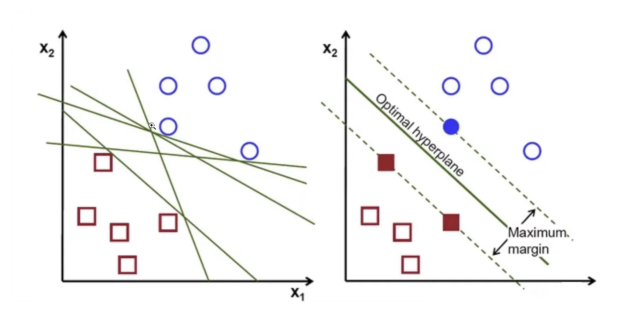

In [71]:
# اس وی ام انتظار داره که خط یا صفحه یا .. به عنوان مرزی بین کلاسها، بیشترین فاصله را  از نقاط کلاسها داشته باشه

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/max_margine_SVM.png')

plt.figure(figsize=(8, 6), facecolor='white')  # تعیین اندازه شکل (عرض 8 اینچ، ارتفاع 6 اینچ)
plt.imshow(img)
plt.axis('off')  # برای خاموش کردن محورها
plt.show()

In [72]:
from sklearn import svm
model = svm.SVC(kernel='linear')
model.fit(X_train_stratified,y_train_stratified)


SVC(kernel='linear')

In [73]:
y_pred_train=model.predict(X_train_stratified)
y_pred_test=model.predict(X_test_stratified)

In [74]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score , accuracy_score
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_pred_test)
acc_train , acc_test


(0.7638436482084691, 0.7987012987012987)

In [75]:
p = precision_score(y_train_stratified,y_pred_train)
r = recall_score(y_train_stratified,y_pred_train)
(p , r)

(0.7048192771084337, 0.5492957746478874)

---
#  الگوریتم ‫Logistic Regression

توضیحات کلی:

     -داخل اسم رگرشن دارد اما ربطی به رگرسیون (یک مقدار پیوسته) ندارد و جزء کلاسیفیکشن (مقدار گسسته)است. 
     یعنی هدف آن پیش‌بینی احتمال تعلق یک نمونه به یک کلاس خاص است، نه پیش‌بینی یک مقدار پیوسته. 
     -باینری کلاسیفیکشن را با استفاده از این الگوریت میتوانیم استفاده کنیم اما بیشترش را نه.
     اگر چه رگرسیون لجستیک را می‌توان با استفاده از تکنیک‌هایی مانند One-vs-Rest (OvR) یا One-vs-All (OvA) برای دسته‌بندی چندکلاسه نیز به کار برد. در این روش‌ها، برای هر کلاس، یک مدل رگرسیون لجستیک جداگانه آموزش داده می‌شود که سعی می‌کند آن کلاس را از بقیه کلاس‌ها جدا کند.
     -رگرسیون لجستیک را می‌توان به عنوان یک شبکه عصبی بسیار ساده در نظر گرفت
     که تنها یک لایه خروجی دارد و هیچ لایه پنهانی ندارد.
     این مدل مستقیماً ورودی را به خروجی نگاشت می‌کند
    -اکتیوشن فانکشن در الگوریتم لاجستیک رگرشن تابع خط ساده نیست بلکه از تابع سیگموئید (لاجستیک) استفاده میکنه.
    در دسته‌بندی باینری، رگرسیون لجستیک همیشه از تابع سیگموید در لایه خروجی استفاده می‌کند. این تابع خروجی بین 0 و 1 تولید می‌کند که به عنوان احتمال تعلق به یک کلاس تفسیر می‌شود.

In [76]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
model.fit(X_train_stratified,y_train_stratified)

LogisticRegression(max_iter=10000)

In [77]:
y_pred_train = model.predict(X_train_stratified)
y_pred_test = model.predict(X_test_stratified)

In [78]:
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_pred_test)
acc_train , acc_test

(0.7703583061889251, 0.8051948051948052)

In [79]:
p = precision_score(y_train_stratified,y_pred_train)
r = recall_score(y_train_stratified,y_pred_train)
p , r

(0.711764705882353, 0.568075117370892)

---
# ANN = Artificial Neural Networks
#ایجاد شبکه عصبی

 #توضیح کلی:
 
 

#"ام ال پی" یا "مولیت لیر پرسپترون" (شبکه عصبی چندلایه  ) که برای دسته‌بندی غیر باینری (چندکلاسه) طراحی شده. 
#در این حالت، لایه خروجی دارای تعداد نورون‌هایی برابر با تعداد کلاس‌ها است و از تابع فعال‌سازی "سفات مکس" برای تولید خروجی‌هایی استفاده می‌شود که نشان‌دهنده احتمال تعلق ورودی به هر کلاس هستند.
 
#اما برای باینری (دو کلاسه) هم استفاده میشه .
______________________________  


#-عبارت ای ان ان در کتابخانه سایکیت لرن همان ام ال پی است 
#-هر لایه دارای نورون است.
#-نورون همان نوود یا گره است
______________________________

#آیا Perceptron یعنی شبکه؟

    نه، Perceptron به خودی خود یک شبکه نیست. پرسپترون یک نورون است که واحد پایه در شبکه‌های عصبی را تشکیل می‌دهد.
     پرسپترون یک ورودی دریافت می‌کند، آن را با وزن ضرب می‌کند، یک بایاس اضافه می‌کند 
     و سپس یک تابع فعال‌سازی روی آن اعمال می‌کند تا خروجی را تولید کند.
     پرسپترون یک مدل خاص از نورون است: پرسپترون اولین مدل ریاضی از نورون بیولوژیکی بود که در حوزه یادگیری ماشین معرفی شد. این مدل دارای ویژگی‌های خاصی است که آن را از یک نورون بیولوژیکی واقعی متمایز می‌کند.
    
    شبکه‌های عصبی، از جمله ام ال پی ، از تعداد زیادی پرسپترون که به صورت لایه‌ای به هم متصل شده‌اند، تشکیل شده‌اند.

Perceptron# یعنی چی؟

    # پرسپترون‌ها بلوک‌های سازنده شبکه‌های عصبی چندلایه (MLP) هستند.
     یک MLP از چندین لایه از پرسپترون‌ها تشکیل شده است که به هم متصل شده‌اند.
    ______________________________
    Perceptron به معنای گیرنده یا دریافت‌کننده است. این نام از نحوه عملکرد پرسپترون الهام گرفته شده است،
     که سعی می‌کند ورودی‌ها را دریافت کند و بر اساس آن‌ها یک تصمیم بگیرد.
    
    ______________________________
    در زمینه یادگیری ماشین، پرسپترون یک الگوریتم یادگیری نظارت شده برای دسته‌بندی باینری است.
     این الگوریتم سعی می‌کند یک خط (یا یک ابرصفحه در ابعاد بالاتر) پیدا کند که داده‌ها را به دو دسته تقسیم کند.
    
    ______________________________
    پرسپترون پایه (برای دسته‌بندی باینری):

    از یک تابع فعال‌سازی پله‌ای (یا گاهی تابع علامت) استفاده می‌کند.
    این تابع یک آستانه تعیین می‌کند و اگر مجموع وزن‌دار ورودی‌ها از این آستانه بیشتر باشد، خروجی 1 است، در غیر این صورت 0.
    خروجی یک تصمیم سخت (0 یا 1) است.
    
    ______________________________
    پرسپترون در دسته‌بندی غیر باینری (چندکلاسه):
    
    پرسپترون پایه به طور مستقیم برای دسته‌بندی چندکلاسه استفاده نمی‌شود.
     برای انجام دسته‌بندی چندکلاسه با استفاده از مفاهیم پرسپترون، معمولاً از رویکردهای زیر استفاده می‌شود:

    استفاده از چندین پرسپترون (مانند روش One-vs-Rest): در این روش، برای هر کلاس یک پرسپترون جداگانه آموزش داده می‌شود.
     هر پرسپترون سعی می‌کند یک کلاس را از بقیه کلاس‌ها جدا کند.
    شبکه‌های عصبی چندلایه (MLP): MLP از چندین لایه پرسپترون تشکیل شده است 
    و می‌تواند الگوهای پیچیده‌تری را یاد بگیرد و مسائل دسته‌بندی چندکلاسه را حل کند.
     در MLP، توابع فعال‌سازی مختلفی می‌توانند استفاده شوند، از جمله:
    سیگموید: می‌تواند در لایه‌های پنهان استفاده شود.
    ReLU: معمولاً در لایه‌های پنهان استفاده می‌شود.
    تانژانت هیپربولیک: می‌تواند در لایه‌های پنهان استفاده شود.
    سافت‌مکس: معمولاً در لایه خروجی برای مسائل دسته‌بندی چندکلاسه استفاده می‌شود.
______________________________

#تفاوت "ام ال پی" و رگرسون لجستیک:
#خصوصیات رگرسیون لجستیک:

        0.الگوریتم لاجستیک رگرشن فقط برای باینری کلسیفیشن اجازه میداد و دوتا بیشتر را نمیشه مگر با توابع خاص
         اما شبکه عصبی هم دوتا هم بیشتراز دوتا را جواب میده         
    1.مدل خطی: اساساً یک مدل خطی است که خروجی آن با استفاده از تابع سیگموید به احتمال تبدیل می‌شود.
    2.سادگی و تفسیرپذیری: مدل ساده‌تری است و تفسیر ضرایب آن آسان‌تر است،
     به این معنی که می‌توان فهمید هر ویژگی چه تاثیری بر پیش‌بینی دارد.
    3.مناسب برای مسائل خطی: بهترین عملکرد را در مسائلی دارد که داده‌ها به صورت خطی قابل جدا شدن هستند.
    4.محدودیت در یادگیری الگوهای پیچیده: به دلیل خطی بودن، نمی‌تواند الگوهای پیچیده و غیرخطی موجود در داده‌ها را به خوبی یاد بگیرد.
    -نداشتن لایه هیدن در رگرسیون لجستیک
    -در اصل  مدل خطی بودن رگرسیون لجستیک به این معنی است که ارتباط بین ورودی‌ها و خروجی به صورت خطی است و نیازی به لایه‌های پنهان برای یادگیری الگوهای پیچیده وجود ندارد. 
    کاربرد: برای مسائل دسته‌بندی باینری یا چندکلاسه (با استفاده از تکنیک‌هایی مانند OvR یا OvA) که نیاز به تفسیرپذیری دارند، مناسب است.

#شبکه عصبی چندلایه (ام ال پی):

    1.مدل غیرخطی: با داشتن چندین لایه و توابع فعال‌سازی غیرخطی، می‌تواند الگوهای پیچیده و غیرخطی موجود در داده‌ها را یاد بگیرد.
    2.پیچیدگی و قدرت: مدل پیچیده‌تری است و قدرت بیشتری در یادگیری الگوهای پیچیده دارد.
    3.کمبود تفسیرپذیری: تفسیر خروجی و نحوه تصمیم‌گیری مدل دشوارتر است.
    4.مناسب برای مسائل غیرخطی: بهترین عملکرد را در مسائلی دارد که داده‌ها به صورت غیرخطی قابل جدا شدن هستند 
    و نیاز به یادگیری الگوهای پیچیده وجود دارد.
    - داشتن لایه هیدن در MLP یک تفاوت اساسی و مهم بین این دو مدل
    -غیرخطی بودن MLP به دلیل وجود لایه‌های پنهان و توابع فعال‌سازی غیرخطی است که به مدل اجازه می‌دهد الگوهای غیرخطی را یاد بگیرد.
    کاربرد: برای مسائل دسته‌بندی و رگرسیون پیچیده، پردازش تصویر، پردازش زبان طبیعی و سایر زمینه‌هایی که داده‌ها دارای ساختار غیرخطی هستند، مناسب است.
    
______________________________

#پرسپترون  (توجه کن که نمیگیم MLP = یعنی پرسپترون چندلایه منظور ما نیست)و رگرسیون لجستیک هر دو برای دسته‌بندی باینری استفاده می‌شوند،
 #اما تفاوت‌های کلیدی بین آن‌ها وجود دارد:
#تابع فعال‌سازی:

    #پرسپترون: از یک تابع فعال‌سازی پله‌ای (یا گاهی تابع علامت) استفاده می‌کند. این تابع یک آستانه تعیین می‌کند و اگر مجموع وزن‌دار ورودی‌ها از این آستانه بیشتر باشد، خروجی 1 است، در غیر این صورت 0.
    #رگرسیون لجستیک: از تابع فعال‌سازی سیگموید استفاده می‌کند که خروجی بین 0 و 1 تولید می‌کند.

#خروجی:

    پرسپترون: یک تصمیم سخت (0 یا 1) ارائه می‌دهد.
    رگرسیون لجستیک: یک احتمال ارائه می‌دهد که می‌تواند به عنوان احتمال تعلق به یک کلاس تفسیر شود.

#آموزش:

    #پرسپترون: معمولاً با یک الگوریتم ساده‌تر آموزش داده می‌شود که در صورت جداپذیر بودن داده‌ها، همگرایی را تضمین می‌کند.
    #رگرسیون لجستیک: معمولاً با روش‌هایی مانند گرادیان نزولی آموزش داده می‌شود و هدف آن به حداکثر رساندن احتمال درست بودن پیش‌بینی‌ها است.

#تفسیرپذیری:

    #پرسپترون: تفسیرپذیری کمتری دارد.
    #رگرسیون لجستیک: معمولاً تفسیرپذیرتر است، زیرا ضرایب آن می‌توانند نشان دهند که هر ویژگی چقدر بر احتمال تعلق به یک کلاس تأثیر می‌گذارد.
    
#به طور کلی:

    تابع فعال‌سازی: پرسپترون از یک تابع فعال‌سازی پله‌ای استفاده می‌کند (اگر مجموع وزن‌دار ورودی‌ها از یک آستانه بیشتر باشد، خروجی 1 است، در غیر این صورت 0). در مقابل، رگرسیون لجستیک از تابع سیگموید استفاده می‌کند که خروجی بین 0 و 1 تولید می‌کند و می‌تواند به عنوان احتمال تعلق به یک کلاس تفسیر شود.
    #خروجی: خروجی پرسپترون یک تصمیم سخت (0 یا 1) است، در حالی که خروجی رگرسیون لجستیک یک احتمال است.
    #آموزش: پرسپترون معمولاً با یک الگوریتم ساده‌تر آموزش داده می‌شود که در صورت جداپذیر بودن داده‌ها، همگرایی را تضمین می‌کند. رگرسیون لجستیک معمولاً با روش‌هایی مانند گرادیان نزولی آموزش داده می‌شود و هدف آن به حداکثر رساندن احتمال درست بودن پیش‌بینی‌ها است.
    تفسیرپذیری: رگرسیون لجستیک معمولاً تفسیرپذیرتر است، زیرا ضرایب آن می‌توانند نشان دهند که هر ویژگی چقدر بر احتمال تعلق به یک کلاس تأثیر می‌گذارد.
    


#   تصور خوب از  بایاس (بایاس یادگیرنده) یا افست
   
        """تصور کنید یک خط دارید که می‌خواهید آن را روی تعدادی نقطه بکشید. 
        اگر فقط اجازه داشته باشید خط را از مبدأ (نقطه صفر) عبور دهید، ممکن است نتوانید بهترین خط را برای پوشش دادن همه نقاط پیدا کنید.
    
        حالا فرض کنید یک دستگیره به خط اضافه شده که می‌توانید آن را به بالا یا پایین حرکت دهید. این دستگیره همان "افست" است. با استفاده از این دستگیره، می‌توانید خط را جابجا کنید تا بهترین حالت برای پوشش دادن نقاط را پیدا کند.
        
        در شبکه‌های عصبی، تابع فعال‌سازی مانند آن خط است و بایاس یادگرنده مانند آن دستگیره. بایاس یادگیرنده به شبکه عصبی کمک می‌کند تا تابع فعال‌سازی را به بالا یا پایین شیفت دهد تا بتواند الگوهای پیچیده‌تری را در داده‌ها یاد بگیرد. به عبارت دیگر، بایاس یادگیرنده به مدل اجازه می‌دهد که فقط به مقادیر ورودی وابسته نباشد، بلکه یک مقدار ثابت را هم در نظر بگیرد که این کار باعث انعطاف‌پذیری بیشتر مدل می‌شود.
        فرض کنید می‌خواهید تصمیم بگیرید که آیا امروز هوا برای پیک‌نیک مناسب است یا نه. ورودی‌ها می‌توانند دما، میزان بارش و میزان آفتابی بودن هوا باشند. اما حتی اگر همه این ورودی‌ها در یک مقدار متوسط باشند، ممکن است شما به دلیل تجربه قبلی یک حس کلی داشته باشید که امروز هوا برای پیک‌نیک مناسب است یا نه. بایاس به مدل کمک می‌کند تا این حس کلی را در نظر بگیرد.

        مثل این است که شما یک آستانه دارید. اگر مجموع وزن‌دار ورودی‌ها از این آستانه بیشتر شود، مدل تصمیم می‌گیرد که یک اتفاق بیفتد. بایاس این آستانه را تنظیم می‌کند.
        """
        
        
# انواع بایاس و تفاوت‌های آن‌ها#
        """ الف) بایاس ثابت (Fixed Bias) –  یک نورون است که مقدارش همیشه ۱ است. 
        اما دارای وزن است که وزن در طول آموزش تغییر میکند
         این وزن طبق اینکه گرادیان خطا چه بوده میزانش تغییر میکند بنابراین برخلاف خود نورون بایاس ،  وزنش یادگیرنده است.
         بنابراین  مقدار نهایی که به معادله اضافه می‌شود، وابسته به وزن این نورون است .
         وظیفه‌اش این است که همیشه مقدار ثابتی را به شبکه عصبی اضافه کند.
        در فرمول به‌صورت جداگانه نمایش داده نمی‌شود.اما این بایاس معمولاً در تمام لایه‌های پنهان و لایه خروجی وجود دارد
        
        ______________________________
         نام‌های دیگر بایاس واحد (Fixed Bias):
                Bias Neuron (نورون بایاس)
                Constant Bias (بایاس ثابت)
        ______________________________
        وزن نورون بایاس (Fixed Bias) طبق چه چیزی اضافه می‌شود؟
                وزن نورون بایاس هم در طول آموزش، مثل بقیه وزن‌های شبکه عصبی، توسط الگوریتم یادگیری تنظیم می‌شود.
                
                 فرآیند تنظیم:
                در ابتدای آموزش، وزن نورون بایاس به‌صورت تصادفی مقداردهی اولیه می‌شود (مثلاً مقدار کوچکی مثل 0.1).
                هنگام پس‌انتشار (Backpropagation)، گرادیان خطا محاسبه می‌شود و وزن بایاس به‌روزرسانی می‌شود تا شبکه عملکرد بهتری داشته باشد.
                این وزن مثل سایر وزن‌ها به‌مرور تغییر می‌کند تا مقدار بهینه‌ای پیدا کند که باعث کاهش خطای مدل شود.
        ______________________________
         مثال: مثال شهودی از نورون بایاس (Fixed Bias) و وزن آن

                 فرض کنید که نورون بایاس مثل یک چراغ همیشه روشن در یک اتاق است.
                 داستان نورون بایاس: چراغی که همیشه روشن است!
                
                تصور کنید که در یک خانه هوشمند، یک چراغ همیشه روشن در اتاق نشیمن وجود دارد. این چراغ هیچ‌وقت خاموش نمی‌شود و همیشه نور دارد. اما میزان نوری که این چراغ به محیط می‌دهد، بستگی به شدت روشنایی آن دارد که با یک دیمر (Dimmer) تنظیم می‌شود.
                
                 نور این چراغ همیشه وجود دارد (یعنی مقدار ۱ ثابت است).
                 
                
                 معادل در شبکه عصبی:
                    چراغ = نورون بایاس (Fixed Bias) که مقدارش همیشه ۱ است.
                    دیمر = وزن نورون بایاس wbwb​ که مقدار نهایی آن را تنظیم می‌کند.
                    نور خروجی = اثر بایاس نهایی که به شبکه اضافه می‌شود (wb×1wb​×1).
                
                  حالا، فرض کنیم که دیمر در ابتدا روی مقدار 0.5 تنظیم شده باشد. پس مقدار نهایی نوری که چراغ تولید می‌کند برابر است با:
                 wb×1=0.5×1=0.5
                 wb​×1=0.5×1=0.5
                
                 اما در طول یادگیری، مدل متوجه می‌شود که باید نور بیشتر باشد، پس مقدار دیمر را به 1.2 تغییر می‌دهد:
                 wb×1=1.2×1=1.2
                 wb​×1=1.2×1=1.2  را بهتر تنظیم کند.
                        
        
        _____________________________________________________________________________________________
        
        ب) بایاس قابل یادگیری (Trainable Bias) – 
                مقداری که شبکه یاد می‌گیرد
                 فقط یک مقدار عددی است که در هر نورونی که در لایه پنهان و خروجی باشد، وجود دارد و در طول آموزش تغییر می‌کند. و خودش یک نورون نیست.
                 مقدار آن توسط الگوریتم یادگیری بهینه‌سازی می‌شود.
                بایاس قابل یادگیری (Trainable Bias) در معادله خروجی هر نورون در شبکه عصبی قرار دارد. معادله عمومی یک نورون در یک شبکه عصبی معمولاً به این شکل است:
                y=σ(w1x1+w2x2+...+wnxn+b)
                y=σ(w1​x1​+w2​x2​+...+wn​xn​+b)
        
                 در این فرمول:
                xixi​ → ورودی‌ها (داده‌های خام)
                wiwi​ → وزن‌ها (وزنی که شبکه به هر داده می‌دهد)
                bb → بایاس قابل یادگیری
                σσ → تابع فعال‌سازی (مثلاً سیگموید، ReLU و ...)
                yy → خروجی نو
                ______________________________
                نام‌های دیگر بایاس قابل یادگیری (Trainable Bias):
                Adaptive Bias (بایاس تطبیقی)
                Learnable Bias (بایاس یادگرفتنی)
                Bias Parameter (پارامتر بایاس) 
                بایاس (بدون هیچ نام یا صفت در کنارش)
            
                 مثال: فرض کنید شما می‌خواهید وزن افراد را با توجه به قدشان پیش‌بینی کنید، اما متوجه می‌شوید که مدل شما همیشه وزن کمتری پیش‌بینی می‌کند. بایاس قابل یادگیری مثل این است که یک مقدار اضافی به پیش‌بینی اضافه کنید تا مدل دقت بیشتری پیدا کند.

        _____________________________________________________________________________________________

        ج) بایاس مدل‌سازی (Model Bias) – خطای ناشی از مدل ساده
        
         این بایاس زمانی رخ می‌دهد که مدل بیش از حد ساده باشد و نتواند الگوهای پیچیده را یاد بگیرد.
         معمولاً باعث می‌شود که مدل همه چیز را بیش از حد ساده کند و دقت پایینی داشته باشد.
        
         مثال: فرض کنید که یک دانش‌آموز برای پیش‌بینی آب و هوا فقط دمای هوا را در نظر می‌گیرد و رطوبت و باد را نادیده می‌گیرد. مدل او بایاس دارد، زیرا داده‌های کافی را برای پیش‌بینی دقیق در نظر نمی‌گیرد."""

 # _____________________________________________________________________________________________
# در هر لایه (ورودی، پنهان و خروجی) چه بایاس‌هایی وجود دارد؟

        """ لایه ورودی (Input Layer):
    
             بایاس قابل یادگیری ندارد! (چون لایه ورودی فقط داده‌ها را به لایه پنهان می‌فرستد و پردازش خاصی روی آن انجام نمی‌شود.)
             نورون بایاس دارد! (به لایه پنهان اضافه می‌شود تا مقدار ثابتی فراهم کند.)
        ______________________________
         لایه‌های پنهان (Hidden Layers):
        
             بایاس قابل یادگیری دارد (در هر نورون یک مقدار بایاس وجود دارد که در طول آموزش تغییر می‌کند.)
             نورون بایاس دارد (در هر لایه پنهان یک نورون بایاس وجود دارد که مقدارش همیشه ۱ است.)
        ______________________________
         لایه خروجی (Output Layer):
        
             بایاس قابل یادگیری دارد (به کمک این بایاس، مدل مقدار خروجی را تنظیم می‌کند.)
             نورون بایاس ندارد! (چون مقدار خروجی نهایی نیاز به یک مقدار ثابت ندارد.)"""
        
# _____________________________________________________________________________________________ 

# چرا به هردو  (نورون بایاس و بایاس) نیاز داریم؟
        
            """بایاس واحد (نورون بایاس): به شبکه ثبات و انعطاف می‌دهد تا خروجی نورون‌ها همیشه وابسته به ورودی‌ها نباشد.
            بایاس قابل یادگیری: باعث می‌شود که مدل مقدار بایاس را برای هر نورون بهینه‌سازی کند و بهتر یاد بگیرد."""

# وقتی می‌گوییم "مقدار بایاس قابل یادگیری توسط الگوریتم یادگیری بهینه‌سازی می‌شود"، منظورمان الگوریتم‌هایی است که برای آموزش شبکه‌های عصبی استفاده می‌شوند. این الگوریتم‌ها وظیفه دارند وزن‌ها و بایاس‌های شبکه را به گونه‌ای تنظیم کنند که عملکرد مدل روی داده‌های آموزشی بهینه شود.

#"""در اینجا چند نمونه از این الگوریتم‌های یادگیری آورده شده است:

    #الگوریتم پس‌انتشار (Backpropagation): این الگوریتم یکی از پرکاربردترین الگوریتم‌ها برای آموزش شبکه‌های عصبی است. پس‌انتشار از قاعده زنجیره‌ای برای محاسبه گرادیان خطا نسبت به وزن‌ها و بایاس‌ها استفاده می‌کند. سپس، با استفاده از این گرادیان‌ها، وزن‌ها و بایاس‌ها در جهت کاهش خطا به‌روزرسانی می‌شوند.
    گرادیان نزولی (Gradient Descent) و انواع آن: گرادیان نزولی یک الگوریتم بهینه‌سازی است که به طور گسترده در یادگیری ماشین استفاده می‌شود. این الگوریتم به صورت تکراری پارامترها (مانند وزن‌ها و بایاس‌ها) را در جهت منفی گرادیان تابع هزینه به‌روزرسانی می‌کند. انواع مختلفی از گرادیان نزولی وجود دارد، مانند گرادیان نزولی دسته‌ای (Batch Gradient Descent)، گرادیان نزولی تصادفی (Stochastic Gradient Descent)، و گرادیان نزولی کوچک دسته‌ای (Mini-batch Gradient Descent).
    الگوریتم‌های بهینه‌سازی پیشرفته: علاوه بر گرادیان نزولی، الگوریتم‌های بهینه‌سازی پیشرفته‌تری نیز وجود دارند که می‌توانند فرآیند یادگیری را تسریع و بهبود بخشند. برخی از این الگوریتم‌ها عبارتند از:
        آدام (Adam): یک الگوریتم بهینه‌سازی تطبیقی که از تخمین‌های مرتبه اول و دوم گرادیان برای تنظیم نرخ یادگیری برای هر پارامتر استفاده می‌کند.
        RMSprop: یک الگوریتم بهینه‌سازی دیگر که نرخ یادگیری را برای هر پارامتر به صورت جداگانه تنظیم می‌کند.
        AdaGrad: یک الگوریتم بهینه‌سازی که نرخ یادگیری را بر اساس تاریخچه گرادیان برای هر پارامتر تنظیم می‌کند.

    این الگوریتم‌ها با استفاده از داده‌های آموزشی و با هدف کاهش خطا، مقدار بایاس‌های قابل یادگیری را به طور خودکار تنظیم می‌کنند. به عبارت دیگر، آن‌ها به شبکه عصبی کمک می‌کنند تا بهترین مقادیر بایاس را پیدا کند که عملکرد مدل را به حداکثر برساند."""
    

# _________________________________________________________________________________

# الگوریتم های بالا برای موراد زیر استفاده میشوند
    #انتخاب مدل: تعیین می‌کنید که از چه نوع الگوریتمی (مثلاً شبکه عصبی، ماشین بردار پشتیبان، رگرسیون لجستیک) برای حل مسئله خود استفاده کنید.
    تابع هزینه (Loss Function): معیاری است که نشان می‌دهد مدل چقدر خوب عمل می‌کند. هدف الگوریتم یادگیری این است که این تابع هزینه را کمینه کند.
    solver (الگوریتم بهینه‌سازی): روشی است که برای یافتن بهترین پارامترهای مدل (وزن‌ها و بایاس‌ها) استفاده می‌شود تا تابع هزینه کمینه شود.




# این‌ها الگوریتم‌های بهینه‌سازی 

        #"""آدام (Adam):
            شرح: آدام (Adaptive Moment Estimation) یک الگوریتم بهینه‌سازی تطبیقی است که برای سرعت‌بخشی به فرآیند یادگیری طراحی شده است. آدام ترکیبی از دو مفهوم است: اولین تخمین (Momentum) که به مدل کمک می‌کند تا حرکت یکنواختی داشته باشد و از نوسانات جلوگیری کند، و دومین تخمین (RMSProp) که نرخ یادگیری را به طور تطبیقی تنظیم می‌کند.
            ویژگی: آدام به طور خاص برای تنظیم نرخ یادگیری به‌صورت خودکار عمل می‌کند و به مدل کمک می‌کند تا به سرعت به حداقل تابع هزینه برسد. این الگوریتم معمولاً برای شبکه‌های عصبی عمیق و پیچیده مفید است.
        ______________________________
        #آر ام اس پراپ (RMSprop):
            شرح: RMSprop (Root Mean Square Propagation) یک الگوریتم بهینه‌سازی است که برای حل مشکل نوسانات زیاد در به‌روزرسانی پارامترها استفاده می‌شود. این الگوریتم نرخ یادگیری را برای هر پارامتر به‌طور جداگانه تنظیم می‌کند، به‌طوری‌که پارامترهایی که بیشتر تغییر کرده‌اند نرخ یادگیری کمتری دریافت می‌کنند و بالعکس.
            ویژگی: RMSprop به‌طور خاص برای مشکلاتی که با نوسانات زیاد مواجه هستند، مانند مسائل یادگیری در شبکه‌های عصبی پیچیده یا داده‌های با نویز زیاد، مفید است.
        ______________________________
        #آداگراد (AdaGrad):
            شرح: آداگراد (Adaptive Gradient Algorithm) یک الگوریتم بهینه‌سازی است که برای تنظیم نرخ یادگیری به‌صورت خودکار استفاده می‌شود. این الگوریتم نرخ یادگیری را به‌طور جداگانه برای هر پارامتر بر اساس تاریخچه گرادیان تنظیم می‌کند. هرچه گرادیان برای پارامتر بزرگتر باشد، نرخ یادگیری آن کمتر می‌شود.
            ویژگی: آداگراد برای مشکلاتی که نیاز به تنظیم نرخ یادگیری دقیق دارند، مانند مسائل یادگیری بر روی داده‌های پراکنده (sparse data)، مناسب است. اما این الگوریتم ممکن است برای مدل‌های بزرگ و پیچیده بیش از حد نرخ یادگیری را کاهش دهد و باعث شود که فرآیند بهینه‌سازی کندتر پیش برود.
            

_____________________________________________________________________________________________
#به طور کلی، این سه الگوریتم بهینه‌سازی برای تنظیم نرخ یادگیری به‌طور هوشمندانه و تطبیقی طراحی شده‌اند و معمولاً در شبکه‌های عصبی و یادگیری عمیق به‌کار می‌روند."""
        
# این موارد (ادامز و..) الگوریتم هستند و به عنوان توابع در نظر گرفته نمی‌شوند، اما در عمل می‌توانند توابعی برای تنظیم نرخ یادگیری باشند. به عبارت دیگر، این الگوریتم‌ها از یک سری معادلات برای به‌روزرسانی پارامترهای مدل (مانند وزن‌ها و بایاس‌ها) استفاده می‌کنند تا تابع هزینه را کمینه کنند، ولی خودشان توابع ریاضی مستقل نیستند. بلکه آن‌ها روش‌هایی هستند که برای اصلاح و بهینه‌سازی پارامترهای مدل به کار می‌روند.


___

# solver:
        """ solver در الگوریتم‌های یادگیری ماشین، به ویژه در شبکه‌های عصبی، نقش کلیدی در فرآیند یادگیری دارد.
        # وظیفه اصلی solver این است که با استفاده از یک الگوریتم بهینه‌سازی، مقادیر وزن‌ها (W) و بایاس‌ها (b) را پیدا کند که تابع هزینه (Loss Function) را به حداقل برساند. تابع هزینه میزان خطا بین پیش‌بینی‌های مدل و مقادیر واقعی را نشان می‌دهد.
        
        # پارامتر solver در الگوریتم‌های یادگیری ماشین مانند شبکه عصبی چند لایه (MLP) در کتابخانه سایکیت لرن، روش یا الگوریتمی را مشخص می‌کند که برای پیدا کردن وزن‌ها (W) و بایاس‌ها (b) در مدل استفاده می‌شود. adam یکی از گزینه‌های رایج برای این پارامتر است."""

______________________________
# انواع solver:
     """انواع مختلفی از solver وجود دارند که هر کدام از الگوریتم‌های بهینه‌سازی متفاوتی استفاده می‌کنند. برخی از رایج‌ترین آن‌ها عبارتند از:
            # lbfgs: یک الگوریتم شبه-نیوتنی است که برای مجموعه‌های داده کوچک مناسب است. 
            # این الگوریتم به حافظه بیشتری نیاز دارد اما معمولاً سریع‌تر همگرا می‌شود.
            # sgd (Stochastic Gradient Descent): یک الگوریتم بهینه‌سازی ساده است که به صورت تصادفی یک زیرمجموعه از داده‌ها را برای محاسبه گرادیان استفاده می‌کند. sgd می‌تواند در مجموعه‌های داده بزرگ موثر باشد اما ممکن است به تنظیم دقیق نرخ یادگیری نیاز داشته باشد.
            # adam: یک الگوریتم بهینه‌سازی مبتنی بر گرادیان است که از تخمین‌های تطبیقی برای نرخ یادگیری استفاده می‌کند. adam معمولاً عملکرد خوبی دارد و به تنظیم کمتری نیاز دارد، به همین دلیل یکی از گزینه‌های محبوب است."""
______________________________        
# بایانس در سولور
        """# در یک شبکه عصبی MLP (Multi-layer Perceptron)، بایاس یک گره اضافی در هر لایه است که مقدار آن همیشه 1 است. 
         این گره با هر گره در لایه بعدی ارتباط دارد و وزن مربوط به آن، بایاس واحد نامیده می‌شود."""
         # بایاس همیشه یک نیست. بایاس یک مقدار قابل یادگیری است که توسط شبکه عصبی تنظیم می‌شود.
         
______________________________
# دلیل استفاده از بایاس واحد:
        """# بایاس واحد به شبکه عصبی اجازه می‌دهد تا یک افست را در تابع فعال‌سازی یاد بگیرد. 
        # به عبارت دیگر، بدون بایاس، شبکه فقط می‌تواند توابع فعال‌سازی را از مبدأ (0,0) یاد بگیرد.
        # با افزودن بایاس، شبکه می‌تواند توابع فعال‌سازی را به سمت بالا یا پایین شیفت دهد،
        # که این امر انعطاف‌پذیری بیشتری به مدل می‌دهد و به آن اجازه می‌دهد تا الگوهای پیچیده‌تری را در داده‌ها یاد بگیرد.
        # 
        # به عنوان مثال، در نظر بگیرید یک نورون با یک ورودی و یک وزن. 
        # اگر تابع فعال‌سازی یک تابع پله‌ای باشد، بدون بایاس، نورون فقط زمانی فعال می‌شود که ورودی بزرگتر از صفر باشد.
        # با افزودن بایاس، می‌توان آستانه فعال‌سازی را تغییر داد.
        # اگر بایاس منفی باشد، نورون حتی برای ورودی‌های کوچکتر از صفر فعال می‌شود،
        # و اگر بایاس مثبت باشد، نورون فقط برای ورودی‌های بزرگتر از یک مقدار مثبت فعال می‌شود."""
______________________________
# بایاس واحد در شبکه‌های عصبی با بایاس در تعادل بین بایاس و واریانس متفاوت است.
    """# بایاس واحد یک پارامتر در مدل شبکه عصبی است که به آن اجازه می‌دهد تا یک افست را یاد بگیرد.
    # بایاس در تعادل بین بایاس و واریانس، یک نوع خطا است که ناشی از ساده‌سازی بیش از حد مدل است."""



 # تابع فعالسازی

# تابع فعالساز در "لجستیک رگرشن" و "ام ال پی" در حالت باینری (دوکلاسه):
        """ -دو مدل لاجستیک رگرشن و ام ال پی  برای دسته‌بندی باینری از تابع سیگموید استفاده میکنند.
        
        -در برخی موارد خاص ممکن است از توابع دیگری استفاده شود:
    تابع تانژانت هیپربولیک (tanh):
     این تابع خروجی بین -1 و 1 تولید می‌کند. اگرچه می‌تواند برای دسته‌بندی باینری استفاده شود، تفسیر خروجی به عنوان احتمال کمی دشوارتر است. ممکن است در برخی موارد خاص که خروجی‌های منفی معنا دارند، استفاده شود.
    تابع خطی: اگرچه برای دسته‌بندی باینری مناسب نیست، اما می‌توان از آن در لایه خروجی استفاده کرد و سپس خروجی را با یک آستانه مقایسه کرد. با این حال، این روش معمولاً منجر به عملکرد ضعیف‌تری می‌شود.
    
    
        - در حالی که از نظر تئوری امکان استفاده از توابع دیگری برای دسته‌بندی باینری وجود دارد، تابع سیگموید به دلیل ویژگی‌هایش (خروجی احتمالی و مشتق‌پذیری) رایج‌ترین و مناسب‌ترین انتخاب است. استفاده از توابع دیگر معمولاً منجر به مشکلات تفسیری یا عملکرد ضعیف‌تر می‌شود."""
______________________________
# تابع فعالساز  "لجستیک رگرشن" و "ام ال پی"  و "پرسپترون" در غیر باینری (چندکلاسه):
         """و ام ال پی برای دسته بندی غیر باینری (چند کلسه) می‌تواند از تابع سیگموید در لایه خروجی استفاده کند. اگرچه می‌تواند از توابع فعال‌سازی دیگری مانند "ReLU" و "تانژانت هیپربولیک" در لایه‌های پنهان خود استفاده کند.
        
        "ام ال پی "معمولا در لایه خروجی از تابع "سافت مکس "برای دسته‌بندی چندکلاسه استفاده می‌کند.
        استفاده از تابع پله‌ای یا تابع علامت در لایه‌های پنهان MLP معمول نیست. این توابع می‌توانند باعث مشکلاتی در فرآیند یادگیری شوند
        
        رگرسیون لجستیک: به طور پیش‌فرض برای دسته‌بندی باینری طراحی شده است. اگر بخواهیم از آن برای دسته‌بندی چندکلاسه استفاده کنیم، باید از تکنیک‌هایی مانند One-vs-Rest (OvR) یا One-vs-One (OvO) استفاده کنیم."""
        
______________________________
        
# تابع فعالساز  "پرسپترون" در غیر باینری (چندکلاسه):
         """پرسپترون پایه از تابع فعال‌سازی پله‌ای (یاگاهی تابع علامت ) استفاده می‌کند. """
        
______________________________
# توابع فعال‌سازی در MLP:

    """ MLP می‌تواند از توابع فعال‌سازی مختلفی استفاده کند. این توابع نقش مهمی در ایجاد غیرخطی بودن و یادگیری الگوهای پیچیده دارند.
     ______________________________
     الف . تابع سیگموید: یک تابع فعال‌سازی غیرخطی است که خروجی بین 0 و 1 تولید می‌کند.
            کاربرد: 1.در لایه خروجی برای مسائل دسته‌بندی باینری (برای تولید احتمال).
            ______________________________
            2.می‌تواند در لایه‌های پنهان استفاده شود، اما به دلیل مشکل گرادیان ناپدید شونده، 
            امروزه کمتر از توابع دیگر استفاده می‌شود.
            ______________________________
            3.در مسائل چندکلاسه با استفاده از تکنیک‌های خاص
             مانند One-vs-Rest (OvR) یا One-vs-All (OvA) ممکن است در مدل‌های باینری استفاده شود.
            زیرا تکنیک‌های OvR و OvA، مسئله چندکلاسه را به چندین مسئله دسته‌بندی باینری تبدیل می‌کنند.
    ______________________________        
    ب. تابع ReLU (Rectified Linear Unit): یک تابع فعال‌سازی غیرخطی محبوب در شبکه‌های عصبی مدرن.
        کاربرد: معمولاً در لایه‌های پنهان به دلیل سادگی، کارایی بالا و جلوگیری از مشکل گرادیان ناپدید شونده استفاده می‌شود.
    ______________________________
    ج. تابع تانژانت هیپربولیک (tanh): یک تابع فعال‌سازی غیرخطی که خروجی بین -1 و 1 تولید می‌کند.
        کاربرد: می‌تواند در لایه‌های پنهان استفاده شود. 
        گاهی به دلیل خروجی بین -1 و 1 در مواردی که خروجی‌های منفی معنا دارند، استفاده می‌شود.
    ______________________________
    د. تابع سافت‌مکس (Softmax): یک تابع فعال‌سازی غیرخطی که خروجی‌هایی بین 0 و 1 تولید می‌کند و مجموع آن‌ها برابر با 1 است.
        کاربرد: معمولاً در لایه خروجی برای مسائل دسته‌بندی چندکلاسه استفاده می‌شود تا احتمال تعلق ورودی به هر کلاس را نشان دهد."""
        
______________________________
# توابع اکتیوشن  در شبکه عصبی "ام ال پی" و هم در دیپ لرنینگ:
        """ReLU و تانژانت هیپربولیک (tanh): معمولاً در لایه‌های پنهان استفاده می‌شوند.
         ReLU به دلیل سادگی و کارایی بالا بسیار محبوب است. تانژانت هیپربولیک گاهی به دلیل خروجی بین -1 و 1 استفاده می‌شود.
         
        سیگموید: می‌تواند در لایه‌های پنهان استفاده شود، اما به دلیل مشکل گرادیان ناپدید شونده، کمتر از ReLU و تانژانت هیپربولیک استفاده می‌شود. سیگموید بیشتر در لایه خروجی برای مسائل دسته‌بندی باینری استفاده می‌شود.
        
        سافت‌مکس: معمولاً در لایه خروجی برای مسائل دسته‌بندی چندکلاسه استفاده می‌شود."""
        

In [80]:
from sklearn.neural_network import MLPClassifier
# ام ال پی مخفف مالتی پلی است که اجازه میده چندین کلسیفشن را هم کلسیفای کنیم
# Multi-layer Perceptron
model = MLPClassifier(hidden_layer_sizes=64 , max_iter=10000)
# -"اکتیوشن" همان توابع هستند که رلو یا لاجستیک (سیگموید) یا.. میتونه باشه
# -"سولور solver "= نحوه حل کردن یا الگوریتمی که دبیلیو بی را پیدا میکنه رو میتونه آدام یا.. باشد
# -"بچ سایز batch_size" یعنی دیتا ها  را بسته بسته میکنه. که میگه بسته ها را چندتایی کنم تا به عنوان ورودی بدم
# -"هیدن لیر" همان لایه های وسطی بین لایه اینپوت و خروجی است. که هر چی تعدادش (تعداد نووود بهش میگن) را بیشتر کنی دقت الگوریتم بیشتر میشه
#-به عنوان مثال hidden_layer_sizes=(200, 100, 50) سه لایه پنهان ایجاد می‌کند، با 200، 100 و 50 نورون به ترتیب.
# مکس ایترشن یعنی تعداد دفعاتی که الگوریتم اجرا میشه


model.fit(X_train_stratified,y_train_stratified)



MLPClassifier(hidden_layer_sizes=64, max_iter=10000)

In [81]:
y_pred_train =  model.predict(X_train_stratified)
y_pred_test = model.predict(X_test_stratified)

In [82]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score , accuracy_score
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_pred_test)
acc_train , acc_test

(0.6921824104234527, 0.6688311688311688)

In [83]:
p = precision_score(y_train_stratified,y_pred_train)
r = recall_score(y_train_stratified,y_pred_train)
(p , r)

(0.5821917808219178, 0.39906103286384975)

___

موازنه بایاس و واریانس چیست؟

موازنه بایاس و واریانس (Bias-Variance Tradeoff) یک مفهوم کلیدی در یادگیری ماشین است
 که به تعادل بین دو نوع خطا در مدل‌های پیش‌بینی می‌پردازد:

    بایاس (Bias): خطایی است که از فرضیات ساده‌کننده در مدل ناشی می‌شود.
     یک مدل با بایاس بالا، فرضیات قوی در مورد داده‌ها دارد 
     و ممکن است نتواند الگوهای پیچیده را یاد بگیرد (Underfitting).
     
    واریانس (Variance): خطایی است که از حساسیت بیش از حد مدل به نوسانات در داده‌های آموزشی ناشی می‌شود.
     یک مدل با واریانس بالا، به شدت به جزئیات داده‌های آموزشی وابسته است 
     و ممکن است عملکرد خوبی روی داده‌های جدید نداشته باشد (Overfitting).

--- 
# الگوریتم K-means برای خوشه بندی (clustering) بی نظارت
 الگوریتم های بی نظارت
الگوریتم K-Means یک الگوریتم خوشه‌بندی غیرنظارتی است که هدف آن گروه‌بندی داده‌ها به K خوشه مجزا است.

خلاصه و کامل:

    تعیین تعداد خوشه‌ها (K): ابتدا باید تعداد خوشه‌ها (K) را تعیین کنید. این کار می‌تواند با استفاده از روش‌هایی مانند روش آرنج (Elbow Method) انجام شود.
    انتخاب نقاط مرکزی اولیه: به طور تصادفی K نقطه را به عنوان مراکز اولیه خوشه‌ها انتخاب کنید.
    تخصیص نقاط داده به خوشه‌ها: هر نقطه داده را به نزدیک‌ترین مرکز خوشه (بر اساس فاصله اقلیدسی) تخصیص دهید.
    به‌روزرسانی مراکز خوشه‌ها: مراکز خوشه‌ها را با میانگین نقاط داده‌ای که به آن خوشه تخصیص داده شده‌اند، مجدداً محاسبه کنید.
    تکرار مراحل 3 و 4: مراحل 3 و 4 را تکرار کنید تا زمانی که مراکز خوشه‌ها دیگر تغییر نکنند یا تغییرات بسیار کم باشند (همگرایی حاصل شود).
    نتیجه: الگوریتم K-Means داده‌ها را به K خوشه گروه‌بندی می‌کند که هر خوشه دارای یک مرکز است.

ویژگی‌های کلیدی:

    سادگی و سرعت: الگوریتم K-Means نسبتاً ساده و سریع است، به خصوص برای داده‌های با ابعاد کم.
    حساسیت به مقدار اولیه: انتخاب مراکز اولیه می‌تواند بر نتیجه نهایی تاثیر بگذارد.
    فرض خوشه‌های کروی: K-Means به خوبی برای خوشه‌هایی که تقریباً کروی و با اندازه مشابه هستند، کار می‌کند.
    نیاز به تعیین K: تعیین تعداد خوشه‌ها از قبل یک چالش است.

کاربردها:

    بخش‌بندی مشتریان
    خوشه‌بندی اسناد
    فشرده‌سازی تصویر
    تشخیص ناهنجاری

In [84]:
#ایجاد دیتاست توسط کتابخانه سایکیت لرن
from sklearn.datasets import make_blobs
# make_blobs برای تولید مجموعه‌های داده مصنوعی به کار می‌رود که شامل خوشه‌های گوسی هستند.

X,y=make_blobs(n_samples=100,n_features=2,centers=3,cluster_std=0.5,random_state=0)
# این خط از تابع make_blobs برای تولید یک مجموعه داده استفاده می‌کند:
#     n_samples=100: تعداد کل نمونه‌های داده‌ای که باید تولید شوند (100 نمونه).
#     n_features=2: تعداد ویژگی‌ها (ابعاد) هر نمونه داده (2 ویژگی).
#     centers=3: تعداد خوشه‌هایی که باید تولید شوند (3 خوشه).
#     cluster_std=0.5: انحراف معیار خوشه‌ها. این مقدار تعیین می‌کند که نقاط داده چقدر پراکنده باشند.      
#     random_state=0: یک عدد تصادفی برای کنترل تولید داده‌های تصادفی. با تعیین این مقدار، هر بار که کد اجرا شود، داده‌های یکسانی تولید می‌شوند.     
     
    #  
    #  خروجی این تابع دو آرایه است:
    # X: یک آرایه دو بعدی که شامل نمونه‌های داده است. هر ردیف یک نمونه و هر ستون یک ویژگی است.
    # y: در اینجا محور نیست 
# بلکه یک آرایه یک بعدی که شامل برچسب‌های واقعی خوشه برای هر نمونه است.
#     یعنی: متغیر y یک لیست یا آرایه است که برای هر نمونه داده در مجموعه داده، یک عدد صحیح (برچسب) را نشان می‌دهد. این عدد صحیح مشخص می‌کند که آن نمونه داده در کدام خوشه قرار دارد.
# 
# به عنوان مثال، اگر y به این صورت باشد: [0, 1, 0, 2, 1, 2, ...]، این نشان می‌دهد:
# * نمونه اول (X[0]) در خوشه 0 قرار دارد.
# * نمونه دوم (X[1]) در خوشه 1 قرار دارد.
# * نمونه سوم (X[2]) در خوشه 0 قرار دارد.
# * نمونه چهارم (X[3]) در خوشه 2 قرار دارد.
# * و به همین ترتیب.
# 
# این برچسب‌ها "واقعی" هستند زیرا توسط تابع make_blobs هنگام تولید داده‌ها تعیین شده‌اند. این برچسب‌ها برای ارزیابی عملکرد الگوریتم‌های خوشه‌بندی استفاده می‌شوند.

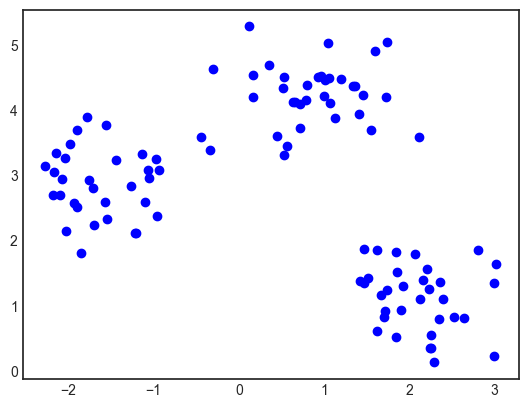

In [85]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1] , color='blue')
# X[:, 0]: تمام ردیف‌ها (:) و ستون اول (0) از آرایه X. این مقادیر مربوط به ویژگی اول نمونه‌ها هستند.
# X[:, 1]: تمام ردیف‌ها (:) و ستون دوم (1) از آرایه X. این مقادیر مربوط به ویژگی دوم نمونه‌ها هستند.

plt.show()

In [86]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3)
# n_clusters=3: تعداد خوشه‌هایی که الگوریتم باید پیدا کند را 3 تعیین می‌کند.

model.fit(X)
# این خط الگوریتم K-Means را روی داده‌های X آموزش می‌دهد. الگوریتم سعی می‌کند مراکز 3 خوشه را پیدا کند که داده‌ها را به بهترین شکل گروه‌بندی کنند.

KMeans(n_clusters=3)

In [87]:
# میخواهیم مرکز کلاسترهایی که پیشبینی کرده را پیدا بکنه
center=model.cluster_centers_
# این خط، مراکز خوشه‌هایی که توسط الگوریتم K-Means پیدا شده‌اند را در متغیر center ذخیره می‌کند. model.cluster_centers_ یک آرایه دو بعدی است که هر ردیف آن مختصات مرکز یک خوشه را نشان می‌دهد.

# چه لیبلی پیشبینی کردی
labels=model.labels_
# ین خط، برچسب‌های خوشه‌ای که توسط الگوریتم K-Means به هر نمونه داده تخصیص داده شده است را در متغیر labels ذخیره می‌کند. model.labels_ یک آرایه یک بعدی است که هر عنصر آن نشان‌دهنده خوشه مربوط به نمونه داده متناظر است.

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


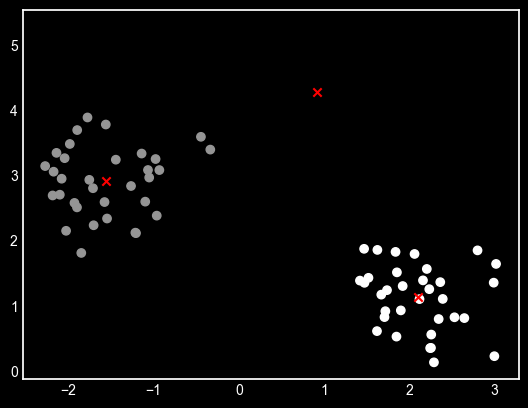

In [88]:

# برای دیدن لیست استایل‌های موجود
print(plt.style.available)

# برای استفاده از یک استایل خاص
plt.style.use('dark_background')

plt.scatter(X[:,0],X[:,1], c=labels)
# c=labels: رنگ نقاط را بر اساس برچسب خوشه‌ای که به هر نقطه تخصیص داده شده است، تعیین می‌کند. هر خوشه رنگ متفاوتی خواهد داشت.

plt.scatter(center[:,0],center[:,1], c='red' , marker='x')
plt.show()

---
# الگوریتم PCA
### از الگوریتم های بی نظارت است#

##### الگوریتم PCA (Principal Component Analysis) یک روش کاهش ابعاد خطی است
#####  که هدف آن تبدیل داده‌های با ابعاد بالا به داده‌های با ابعاد کمتر است، در حالی که بیشترین واریانس داده‌ها حفظ شود.

خلاصه و کامل:

    استانداردسازی داده‌ها: ابتدا داده‌ها را استانداردسازی کنید تا میانگین هر ویژگی صفر و واریانس آن یک شود. این کار برای جلوگیری از تاثیر مقیاس ویژگی‌ها بر نتیجه PCA ضروری است.
    محاسبه ماتریس کوواریانس: ماتریس کوواریانس داده‌ها را محاسبه کنید. این ماتریس نشان می‌دهد که چگونه ویژگی‌ها نسبت به یکدیگر تغییر می‌کنند.
    محاسبه مقادیر ویژه و بردارهای ویژه: مقادیر ویژه و بردارهای ویژه ماتریس کوواریانس را محاسبه کنید. مقادیر ویژه نشان‌دهنده میزان واریانس داده‌ها در جهت بردار ویژه متناظر هستند.
    مرتب‌سازی مقادیر ویژه: مقادیر ویژه را به ترتیب نزولی مرتب کنید.
    انتخاب مولفه‌های اصلی: بر اساس مقادیر ویژه مرتب شده، تعداد مولفه‌های اصلی (ابعاد جدید) را انتخاب کنید. معمولاً مولفه‌هایی انتخاب می‌شوند که درصد قابل توجهی از واریانس کل داده‌ها را پوشش دهند.
    تبدیل داده‌ها: داده‌های اصلی را با استفاده از بردارهای ویژه متناظر با مولفه‌های اصلی انتخاب شده، به فضای جدید با ابعاد کمتر تبدیل کنید.

ویژگی‌های کلیدی:

    کاهش ابعاد: PCA به طور موثر ابعاد داده‌ها را کاهش می‌دهد.
    حفظ واریانس: PCA سعی می‌کند بیشترین واریانس داده‌ها را در ابعاد جدید حفظ کند.
    خطی بودن: PCA یک روش خطی است.
    حساسیت به مقیاس: نیاز به استانداردسازی داده‌ها دارد.

کاربردها:

    کاهش ابعاد داده‌های بزرگ که سلیقه ای عمل نمیکنه
    تجسم داده‌ها
    استخراج ویژگی‌ها
    کاهش نویز
    
##### نکته: لزوما یک یا چند فیچر را حذف نمیکنه. گاهی ممکنه با ترکیب فیچرها بعد را کاهش بده 

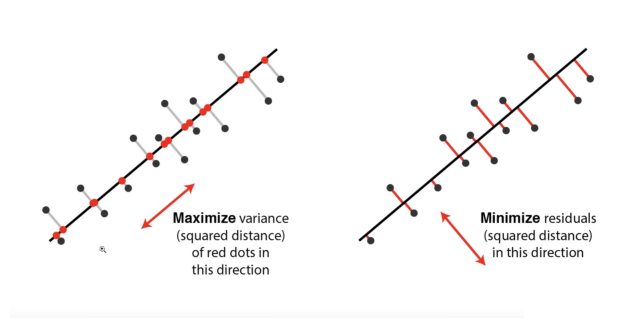

In [89]:
# اس وی ام انتظار داره که خط یا صفحه یا .. به عنوان مرزی بین کلاسها، بیشترین فاصله را  از نقاط کلاسها داشته باشه

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('images/PCA.png')

plt.figure(figsize=(8, 6), facecolor='white')  # تعیین اندازه شکل (عرض 8 اینچ، ارتفاع 6 اینچ)
plt.imshow(img)
plt.axis('off')  # برای خاموش کردن محورها
plt.show()

# در پی سی ای در دوبعدی: دنبال خطی هستیم که راستاش  بیشترین میزان تغییرات یا واریانس داشته باشه
# و اگر دونه دونه نقاط را بیندازیم روی آن خط، کمترین میزان خطا (فاصله) را داشته باشه
# در سه بعدی: میشه صفحه
#  در چهار بعدی میشه مولفه های اصلی:
# که # مولفه اول میشه بیشترین میزان تغییرات و کمترین میزان خطا
# دومین مولفه میشه: اولین شرطش اینه که روی مولفه اول عمود باشه  و ثانیا حالا تغییرات روی این خط بیشترین میزان تغییرات را داشته باشه
# مولفه سوم: باید به این دو مولفه عمود باشه و سومین تغییرات بیشتر را داشته باشه. یعنی  

In [94]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
# یعنی تعداد فیچرها را که 8 تا بود را 2 تا بکن

pca.fit(X_test_stratified)

PCA(n_components=2)

In [95]:
X_new_train = pca.transform(X_train_stratified)
X_new_test = pca.transform(X_test_stratified)
X_train_stratified , X_new_train 

# متد transform() در الگوریتم‌هایی مانند PCA، وظیفه دارد داده‌های جدید را به فضایی که توسط الگوریتم در مرحله fit() یاد گرفته شده است، منتقل کند.
# در مورد PCA، وقتی شما pca.fit(X_test_stratified) را اجرا می‌کنید، الگوریتم PCA بر روی داده‌های X_test_stratified اعمال می‌شود و مولفه‌های اصلی (جهت‌هایی که بیشترین واریانس داده‌ها را دارند) را شناسایی می‌کند.
# 
# سپس، وقتی شما از transform() استفاده می‌کنید، این متد از همان مولفه‌های اصلی که در مرحله fit() به دست آمده‌اند، برای تبدیل داده‌های جدید (مانند X_train_stratified یا X_test_stratified) به یک فضای جدید با ابعاد کمتر استفاده می‌کند.
# 
# به عبارت دیگر، transform() داده‌های جدید را بر اساس دانش (مولفه‌های اصلی) که از داده‌های قبلی به دست آمده، به یک فضای جدید نگاشت می‌کند.

(array([[6.00e+00, 1.15e+02, 6.00e+01, ..., 3.37e+01, 2.45e-01, 4.00e+01],
        [3.00e+00, 1.11e+02, 5.80e+01, ..., 2.95e+01, 4.30e-01, 2.20e+01],
        [0.00e+00, 1.01e+02, 6.50e+01, ..., 2.46e+01, 2.37e-01, 2.20e+01],
        ...,
        [3.00e+00, 1.16e+02, 7.40e+01, ..., 2.63e+01, 1.07e-01, 2.40e+01],
        [0.00e+00, 7.80e+01, 8.80e+01, ..., 3.69e+01, 4.34e-01, 2.10e+01],
        [5.00e+00, 1.36e+02, 8.20e+01, ..., 0.00e+00, 6.40e-01, 6.90e+01]],
       shape=(614, 8)),
 array([[-77.90982105,   1.86677385],
        [-35.16450848,  -5.49667114],
        [-79.8917371 , -12.38661422],
        ...,
        [ 25.21219122,  -5.48063633],
        [-41.66049831, -41.75393544],
        [-78.28966693,  26.97088548]], shape=(614, 2)))

In [96]:
y_new_pred_train = model.predict(X_new_train)
y_new_pred_test = model.predict(X_new_test)


In [97]:
acc_train = accuracy_score(y_true= y_train_stratified, y_pred=y_new_pred_train)
acc_test = accuracy_score(y_true= y_test_stratified, y_pred=y_new_pred_test)
acc_train , acc_test

(0.4234527687296417, 0.43506493506493504)